In [2]:
# restart kernel if packages being imported are out of date/not the latest local version
from pur_postgres_population_script import read_from_download_folder, read_year, read_text
from collections import Counter

/Users/denbanek/.pyenv/versions/3.7.3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
download_path = '/Users/denbanek/Downloads/pur_data_uncompressed/'

In [4]:
years = read_from_download_folder(download_path)

/Users/denbanek/Downloads/pur_data_uncompressed/pur2007
/Users/denbanek/Downloads/pur_data_uncompressed/pur2018
/Users/denbanek/Downloads/pur_data_uncompressed/pur2017


In [5]:
# an example
year = years[1]
files = read_year(year)

In [6]:
file_ = files[1]
text = read_text(file_)

In [7]:
labels = text[0]
labels = labels.replace('\n', '') # remove end of line character
labels = labels.split(',') # split by comma into a list

content_lines = text[1:]

In [8]:
# for m content lines, n labels O(m * (len(lines) + n)) ~O(15,000 * (160 + 35)) computations
# loop through the lines and clean them
for line_index in range(len(content_lines)): 

    # O(len(line)) + O(len(line))
    # artifact from .txt file
    content_lines[line_index] = content_lines[line_index].replace('\n', '').split(',')
    
    # labels is n, runs in O(n)
    # three different null/empty types occur in the data
    for column_index in range(len(labels)):        
        if content_lines[line_index][column_index] is '':
            content_lines[line_index][column_index] = '<NULLSTRING>'
        elif content_lines[line_index][column_index] is '""':
            content_lines[line_index][column_index] = '<EMPTYSTRING>'
        elif content_lines[line_index][column_index] is ',,':
            content_lines[line_index][column_index] = '<NULL>'

In [9]:
# declare the text file data structure
file_text_as_dictionary = {}
    
# initialize the text file data structure with the two lines
for col_index in range(len(labels)): 
    file_text_as_dictionary[labels[col_index]] = [content_lines[0][col_index], content_lines[1][col_index]]

In [10]:
print(len(content_lines))
print(len(content_lines[:][0]))
print(len(labels))

15375
35
35


In [11]:
file_text_as_dictionary

{'use_no': ['139928', '3526498'],
 'prodno': ['26192', '27990'],
 'chem_code': ['105', '560'],
 'prodchem_pct': ['5', '98'],
 'lbs_chm_used': ['.15', '269.5'],
 'lbs_prd_used': ['3', '275'],
 'amt_prd_used': ['48', '275'],
 'unit_of_meas': ['OZ', 'LB'],
 'acre_planted': ['<NULLSTRING>', '39'],
 'unit_planted': ['<NULLSTRING>', 'A'],
 'acre_treated': ['<NULLSTRING>', '39'],
 'unit_treated': ['<NULLSTRING>', 'A'],
 'applic_cnt': ['<NULLSTRING>', '1'],
 'applic_dt': ['01/01/2018', '05/13/2018'],
 'applic_time': ['<NULLSTRING>', '1200'],
 'county_cd': ['17', '17'],
 'base_ln_mer': ['<NULLSTRING>', 'M'],
 'township': ['<NULLSTRING>', '15'],
 'tship_dir': ['<NULLSTRING>', 'N'],
 'range': ['<NULLSTRING>', '09'],
 'range_dir': ['<NULLSTRING>', 'W'],
 'section': ['<NULLSTRING>', '03'],
 'site_loc_id': ['""', '"LP03046"'],
 'grower_id': ['""', '"17181700046"'],
 'license_no': ['"31761"', '""'],
 'planting_seq': ['<NULLSTRING>', '<NULLSTRING>'],
 'aer_gnd_ind': ['<NULLSTRING>', 'G'],
 'site_code'

In [12]:
%%time
file_text_as_dictionary['document_no']

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


['100', '3']

In [13]:
%%time
for col_index in range(len(labels)):
    existing_values = file_text_as_dictionary[labels[col_index]]
    
    for line in content_lines[2:]: 
        existing_values.append(line[col_index])
    
#     print(len(existing_values))

CPU times: user 145 ms, sys: 4.48 ms, total: 149 ms
Wall time: 148 ms


In [14]:
for key in list(file_text_as_dictionary.keys())[13:]:
    print(key, ":\n\t", file_text_as_dictionary[key][10:17])

applic_dt :
	 ['04/01/2018', '07/23/2018', '07/23/2018', '07/23/2018', '08/01/2018', '10/01/2018', '12/01/2018']
applic_time :
	 ['<NULLSTRING>', '0700', '0700', '0700', '<NULLSTRING>', '<NULLSTRING>', '<NULLSTRING>']
county_cd :
	 ['17', '17', '17', '17', '17', '17', '17']
base_ln_mer :
	 ['<NULLSTRING>', 'M', 'M', 'M', '<NULLSTRING>', '<NULLSTRING>', '<NULLSTRING>']
township :
	 ['<NULLSTRING>', '14', '14', '14', '<NULLSTRING>', '<NULLSTRING>', '<NULLSTRING>']
tship_dir :
	 ['<NULLSTRING>', 'N', 'N', 'N', '<NULLSTRING>', '<NULLSTRING>', '<NULLSTRING>']
range :
	 ['<NULLSTRING>', '09', '09', '09', '<NULLSTRING>', '<NULLSTRING>', '<NULLSTRING>']
range_dir :
	 ['<NULLSTRING>', 'W', 'W', 'W', '<NULLSTRING>', '<NULLSTRING>', '<NULLSTRING>']
section :
	 ['<NULLSTRING>', '35', '35', '35', '<NULLSTRING>', '<NULLSTRING>', '<NULLSTRING>']
site_loc_id :
	 ['""', '"KV10E104"', '"KV11A104"', '"KV11H104"', '""', '""', '""']
grower_id :
	 ['""', '"17181700104"', '"17181700104"', '"17181700104"', '"

### data types 

'use_no': integer/non decimal number

'prodno': integer/non decimal number

'chem_code': integer/non decimal number

'prodchem_pct': float/decimal (precentage value, range is (0,100]

'lbs_chm_used': float/decimal

'lbs_prd_used': float/decimal [1] 

'amt_prd_used': float/decimal [1]

'unit_of_meas': tuple of chars, {OZ, LB, PT, QT, GA, ML, LI, GR, KG} [2]

'acre_planted': float/decimal [1]

'unit_planted': char, {A, S, C, K, U} [3]

'acre_treated': float/decimal 

'unit_treated': char, {A, S, C, K, P, T, U} [4]

'applic_cnt': integer/non decimal number

'applic_dt': MM/DD/YYYY

'applic_time': HHMM (hour, hour, minute, minute), integer/non-decimal number

'county_cd': tuple of Chars [01,58]

'base_ln_mer': char, {S, M, H} [5]

'township': char tuple [01, 48]

'tship_dir': char {N, S}

'range': char [01, 48]

'range_dir': char {E, W}

'section': tuple of chars [01, 36]

'site_loc_id': 8 chars

'grower_id': 11 chars

'license_no': drop

'planting_seq': (drop, not validated, usually null)

'aer_gnd_ind': char {A, G, O} [6]

'site_code': integer/non decimal number

'qualify_cd': integer/non decimal number

'batch_no': drop

'document_no': drop

'summary_cd': drop

'record_id': drop

'comtrs': drop

'error_flag': drop


[1] may be worth figuring out exactly how big this number can get empirically? It's an important feild. Maybe its # of 10s used? Like N(8) means 10*8 is max?

[2] Codes are:
OZ ounces, LB pounds, PT pints,
QT quarts, GA gallons, ML milliliters, LI liters,
GR grams, KG kilograms

[3] Codes are:
A acres,
S square feet,
C cubic feet,
K thousand cubic feet,
U Misc. Examples of misc. units include: bins, tree holes, bunches, pallets, etc.

[4] Codes: 
A acres
S square feet C cubic feet
K thousand cubic feet) P pounds
T tons
U misc. unit (Examples of misc. units (U) include: bins, tree holes, bunches, pallets, etc.)

[5] Codes for the meridians in California are: S (San Bernardino), M (Mount Diablo), H (Humboldt).

[6] A Aerially applied G Ground (ground-based equipment) applied O Other application methods


Notes:
This data was stored on a cd rom, can we just use standard types like double, int, string instead of primitives?

#### some analysis on the values that exist in this data set when NOT cleaned
index = 1
for label in labels: 
    print(index, labels[index-1], Counter(file_text_as_dictionary[label]).most_common()[0:5], "\n")
    index += 1
    
1 use_no [('591535', 6), ('139982', 5), ('1144552', 5), ('3526369', 5), ('3526219', 5)] 

2 prodno [('54326', 1284), ('53892', 512), ('63468', 483), ('56901', 482), ('68809', 434)] 

3 chem_code [('', 2206), ('560', 1730), ('401', 779), ('1798', 642), ('91798', 642)] 

4 prodchem_pct [('', 2206), ('98', 1387), ('80', 1023), ('18.3', 642), ('.17', 642)] 

5 lbs_chm_used [('', 2215), ('.0005', 42), ('.017', 35), ('1.83', 34), ('12', 32)] 

6 lbs_prd_used [('10', 185), ('5', 125), ('20', 110), ('7', 103), ('15', 96)] 

7 amt_prd_used [('10', 265), ('6', 222), ('2', 212), ('1', 201), ('20', 198)] 

8 unit_of_meas [('OZ', 6444), ('LB', 5262), ('GA', 3023), ('QT', 445), ('GR', 98)] 

9 acre_planted [('', 2437), ('206', 595), ('278', 582), ('395', 538), ('626', 489)] 

10 unit_planted [('A', 12927), ('', 2437), ('U', 11)] 

11 acre_treated [('', 2394), ('10', 515), ('20', 393), ('5', 303), ('14', 288)] 

12 unit_treated [('A', 12946), ('', 2394), ('U', 28), ('S', 7)] 

13 applic_cnt [('1', 13368), ('', 926), ('2', 224), ('3', 108), ('4', 85)] 

14 applic_dt [('06/01/2018', 398), ('02/02/2018', 366), ('05/01/2018', 363), ('08/01/2018', 318), ('04/01/2018', 264)] 

15 applic_time [('1159', 3292), ('', 2440), ('0100', 1494), ('0800', 980), ('1000', 700)] 

16 county_cd [('17', 15375)] 

17 base_ln_mer [('M', 12938), ('', 2437)] 

18 township [('13', 4715), ('14', 3328), ('12', 3311), ('', 2437), ('15', 989)] 

19 tship_dir [('N', 12938), ('', 2437)] 

20 range [('09', 5493), ('08', 2863), ('07', 2658), ('', 2437), ('10', 1387)] 

21 range_dir [('W', 12938), ('', 2437)] 

22 section [('', 2437), ('03', 1389), ('04', 963), ('20', 945), ('21', 850)] 

23 site_loc_id [('""', 2437), ('"OK71A414"', 595), ('"RH73C295"', 577), ('"RH21A011"', 538), ('"RH38A011"', 489)] 

24 grower_id [('""', 2316), ('"17161700295"', 1605), ('"17171700011"', 1334), ('"17181700159"', 1303), ('"17171700030"', 1189)] 

25 license_no [('""', 13059), ('"PR 0001"', 295), ('"PR 4227"', 280), ('"PR 3066"', 161), ('"31761"', 145)] 

26 planting_seq [('', 15375)] 

27 aer_gnd_ind [('G', 12781), ('', 2437), ('O', 107), ('A', 48), ('F', 2)] 

28 site_code [('29143', 8061), ('4003', 4164), ('10', 1781), ('30', 421), ('3009', 298)] 

29 qualify_cd [('0', 15235), ('60', 121), ('20', 15), ('2', 4)] 

30 batch_no [('1701', 10889), ('1703', 2376), ('1702', 1927), ('1706', 67), ('1705', 65)] 

31 document_no [('5', 48), ('1', 48), ('3', 47), ('4', 47), ('2', 46)] 

32 summary_cd [('1', 6827), ('2', 4378), ('3', 1803), ('4', 934), ('5', 374)] 

33 record_id [('A', 10940), ('C', 2437), ('B', 1998)] 

34 comtrs [('', 2437), ('17M12N07W20', 850), ('17M12N08W03', 701), ('17M13N09W04', 694), ('17M14N09W35', 597)] 

35 error_flag [('', 15102), ('X', 273)] 

#### some analysis on the values that exist in this data set when cleaned
index = 1
for label in labels: 
    print(index, labels[index-1], Counter(file_text_as_dictionary[label]).most_common()[0:5], "\n")
    index += 1
    
1 use_no [('591535', 6), ('139982', 5), ('1144552', 5), ('3526369', 5), ('3526219', 5)] 

2 prodno [('54326', 1284), ('53892', 512), ('63468', 483), ('56901', 482), ('68809', 434)] 

3 chem_code [('<NULLSTRING>', 2206), ('560', 1730), ('401', 779), ('1798', 642), ('91798', 642)] 

4 prodchem_pct [('<NULLSTRING>', 2206), ('98', 1387), ('80', 1023), ('18.3', 642), ('.17', 642)] 

5 lbs_chm_used [('<NULLSTRING>', 2215), ('.0005', 42), ('.017', 35), ('1.83', 34), ('12', 32)] 

6 lbs_prd_used [('10', 185), ('5', 125), ('20', 110), ('7', 103), ('15', 96)] 

7 amt_prd_used [('10', 265), ('6', 222), ('2', 212), ('1', 201), ('20', 198)] 

8 unit_of_meas [('OZ', 6444), ('LB', 5262), ('GA', 3023), ('QT', 445), ('GR', 98)] 

9 acre_planted [('<NULLSTRING>', 2437), ('206', 595), ('278', 582), ('395', 538), ('626', 489)] 

10 unit_planted [('A', 12927), ('<NULLSTRING>', 2437), ('U', 11)] 

11 acre_treated [('<NULLSTRING>', 2394), ('10', 515), ('20', 393), ('5', 303), ('14', 288)] 

12 unit_treated [('A', 12946), ('<NULLSTRING>', 2394), ('U', 28), ('S', 7)] 

13 applic_cnt [('1', 13368), ('<NULLSTRING>', 926), ('2', 224), ('3', 108), ('4', 85)] 

14 applic_dt [('06/01/2018', 398), ('02/02/2018', 366), ('05/01/2018', 363), ('08/01/2018', 318), ('04/01/2018', 264)] 

15 applic_time [('1159', 3292), ('<NULLSTRING>', 2440), ('0100', 1494), ('0800', 980), ('1000', 700)] 

16 county_cd [('17', 15375)] 

17 base_ln_mer [('M', 12938), ('<NULLSTRING>', 2437)] 

18 township [('13', 4715), ('14', 3328), ('12', 3311), ('<NULLSTRING>', 2437), ('15', 989)] 

19 tship_dir [('N', 12938), ('<NULLSTRING>', 2437)] 

20 range [('09', 5493), ('08', 2863), ('07', 2658), ('<NULLSTRING>', 2437), ('10', 1387)] 

21 range_dir [('W', 12938), ('<NULLSTRING>', 2437)] 

22 section [('<NULLSTRING>', 2437), ('03', 1389), ('04', 963), ('20', 945), ('21', 850)] 

23 site_loc_id [('""', 2437), ('"OK71A414"', 595), ('"RH73C295"', 577), ('"RH21A011"', 538), ('"RH38A011"', 489)] 

24 grower_id [('""', 2316), ('"17161700295"', 1605), ('"17171700011"', 1334), ('"17181700159"', 1303), ('"17171700030"', 1189)] 

25 license_no [('""', 13059), ('"PR 0001"', 295), ('"PR 4227"', 280), ('"PR 3066"', 161), ('"31761"', 145)] 

26 planting_seq [('<NULLSTRING>', 15375)] 

27 aer_gnd_ind [('G', 12781), ('<NULLSTRING>', 2437), ('O', 107), ('A', 48), ('F', 2)] 

28 site_code [('29143', 8061), ('4003', 4164), ('10', 1781), ('30', 421), ('3009', 298)] 

29 qualify_cd [('0', 15235), ('60', 121), ('20', 15), ('2', 4)] 

30 batch_no [('1701', 10889), ('1703', 2376), ('1702', 1927), ('1706', 67), ('1705', 65)] 

31 document_no [('5', 48), ('1', 48), ('3', 47), ('4', 47), ('2', 46)] 

32 summary_cd [('1', 6827), ('2', 4378), ('3', 1803), ('4', 934), ('5', 374)] 

33 record_id [('A', 10940), ('C', 2437), ('B', 1998)] 

34 comtrs [('<NULLSTRING>', 2437), ('17M12N07W20', 850), ('17M12N08W03', 701), ('17M13N09W04', 694), ('17M14N09W35', 597)] 

35 error_flag [('<NULLSTRING>', 15102), ('X', 273)]

The clean and not clean data show no errors in the flag placement process.
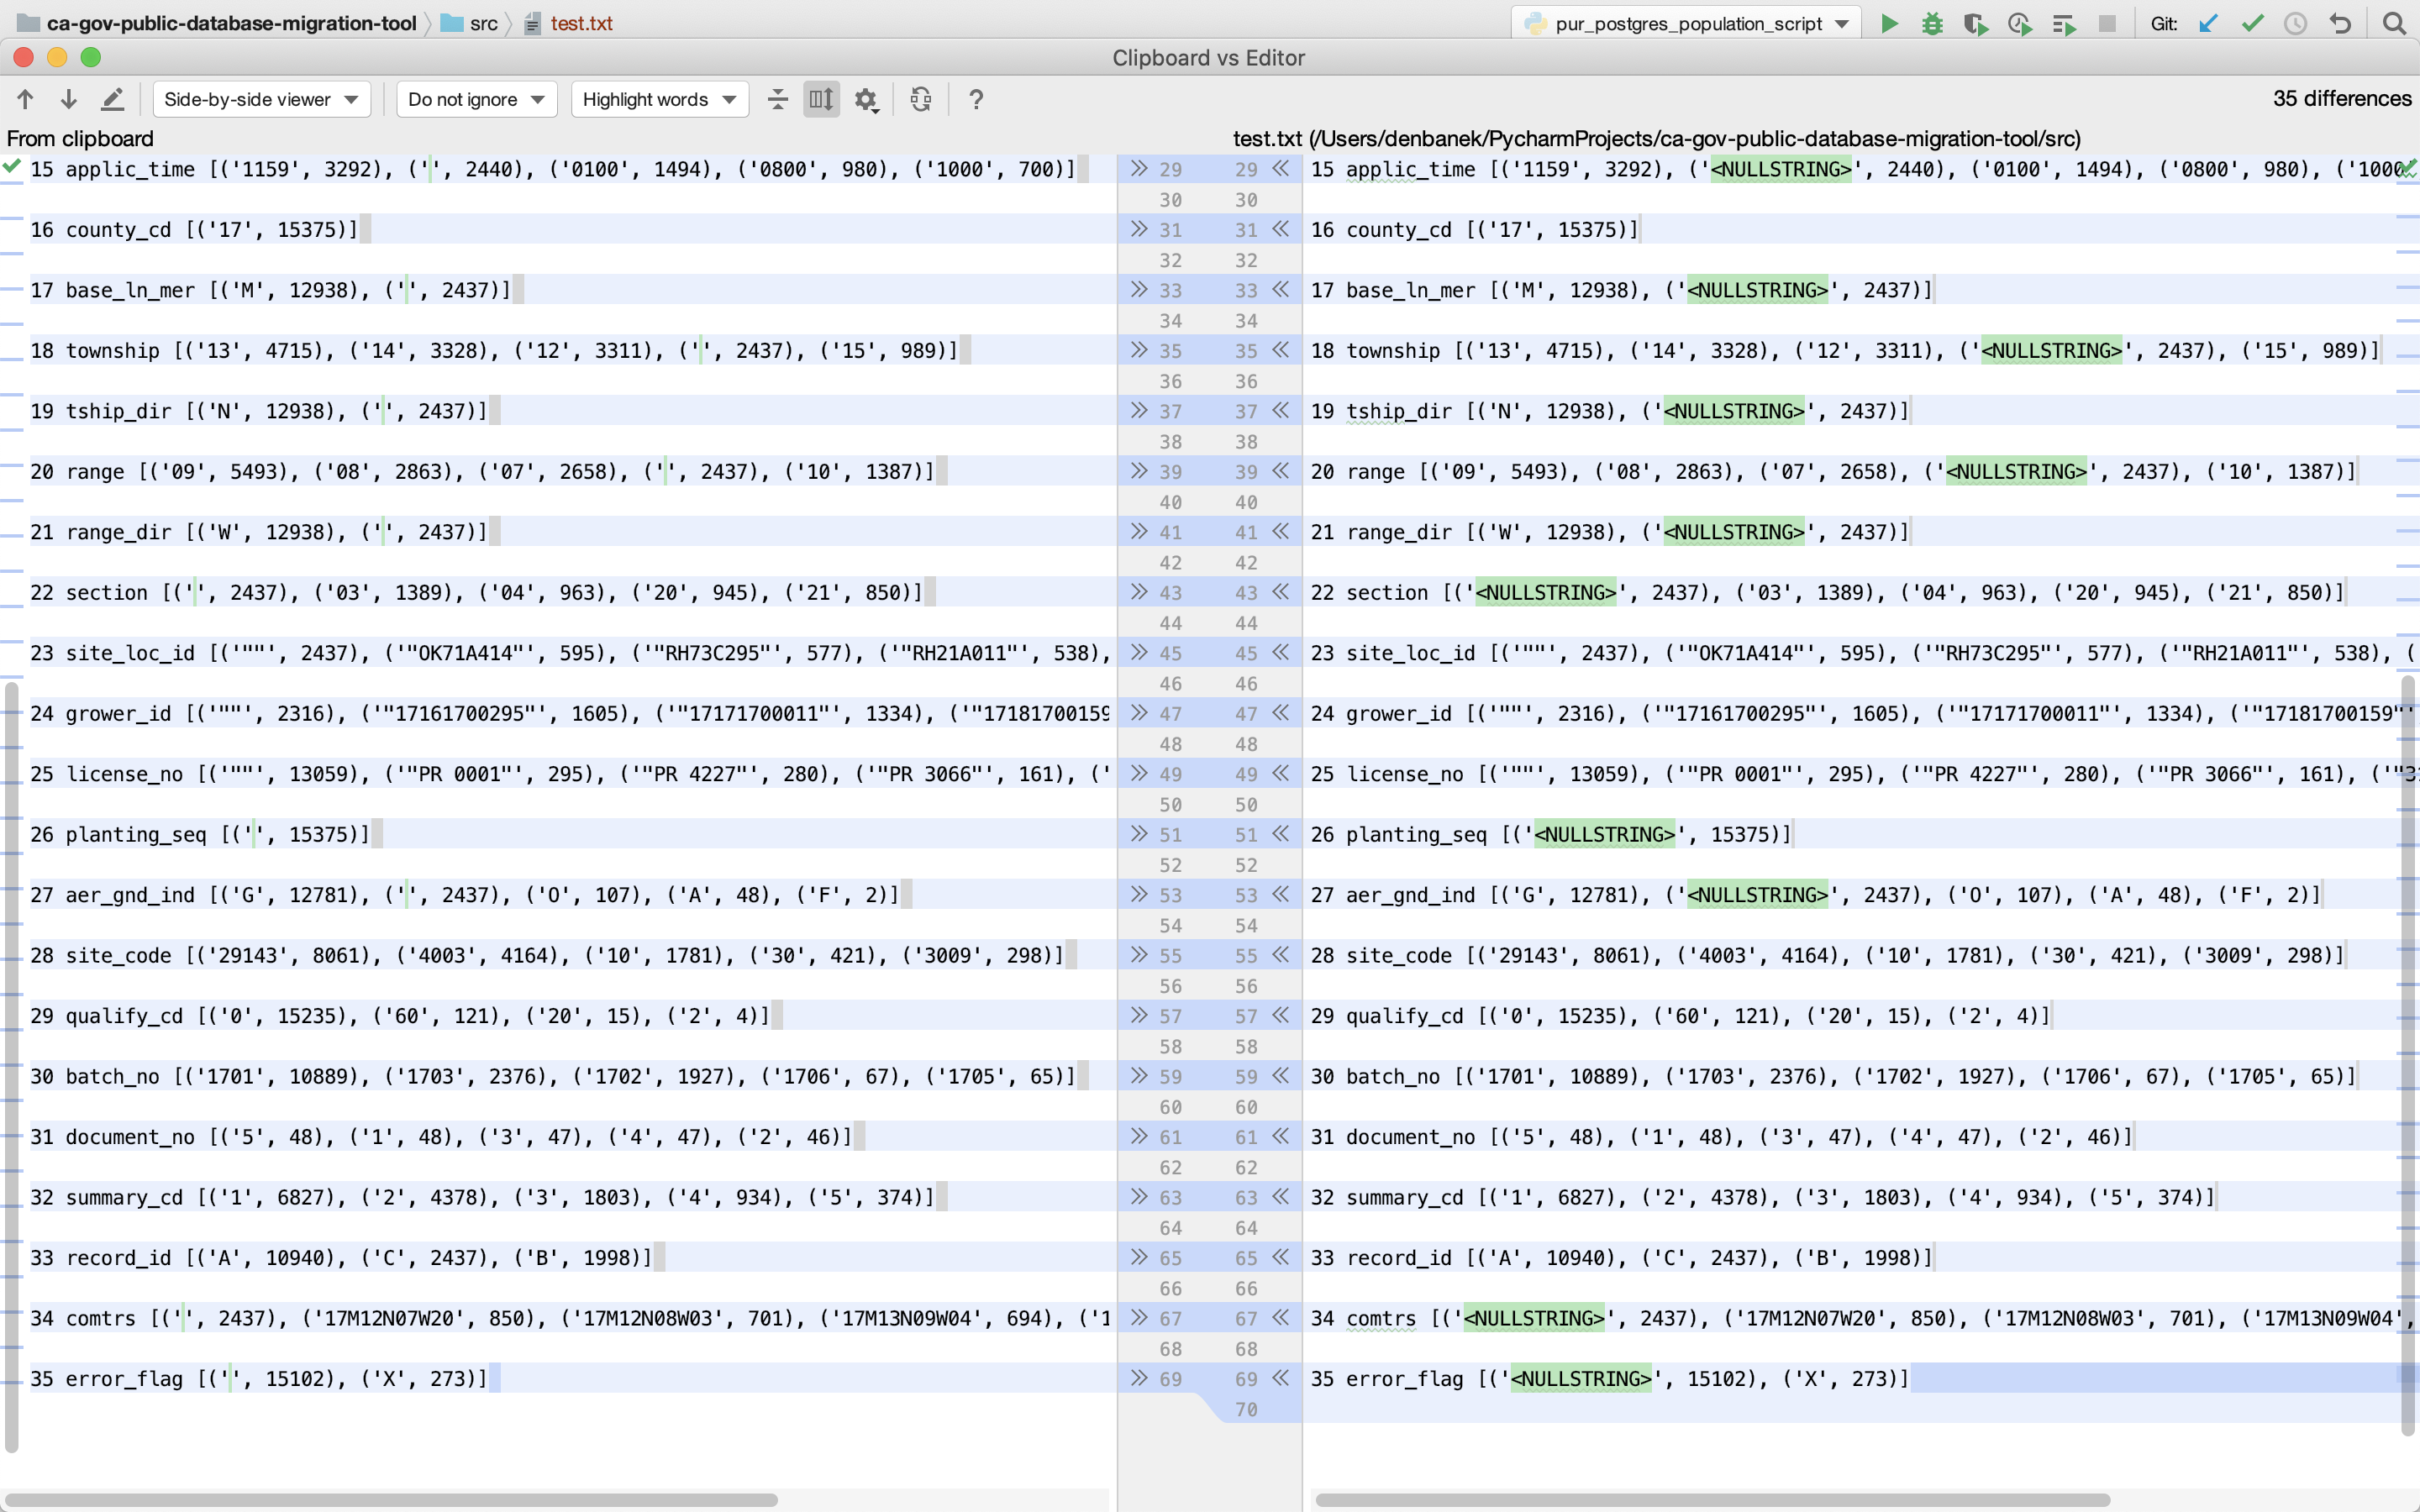
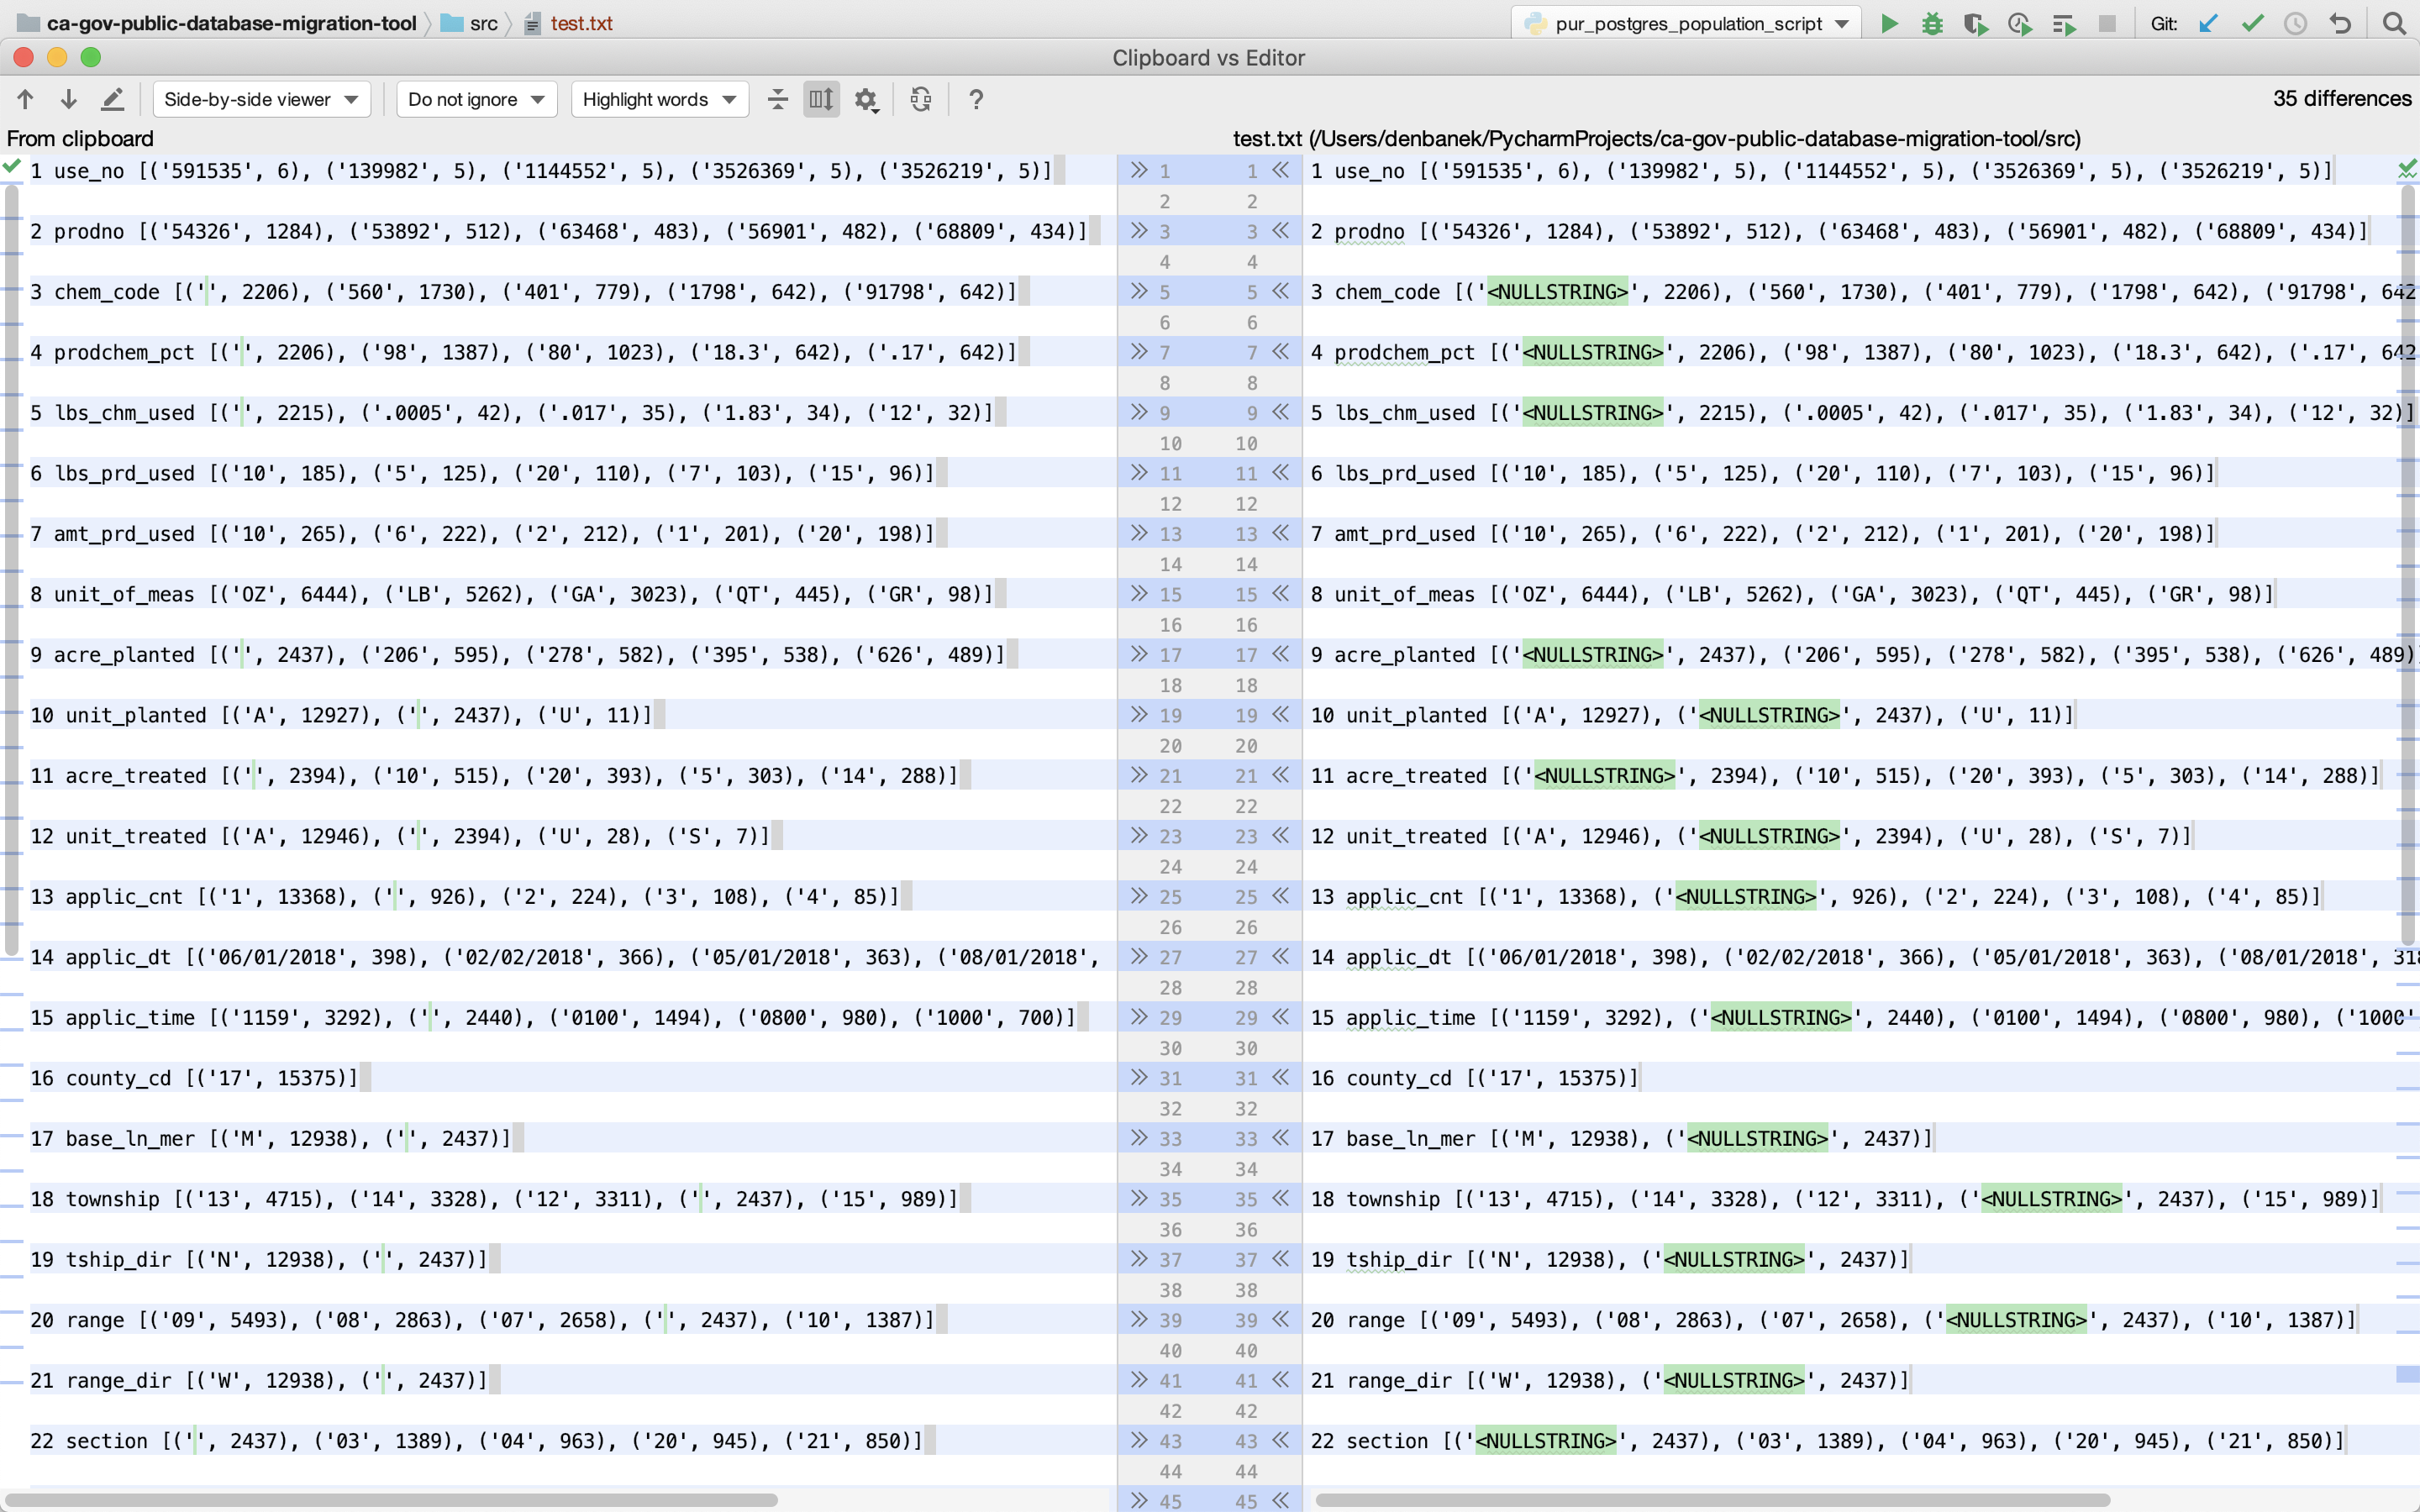